### Packages

In [1]:
using DynamicalSystems, DifferentialEquations, OrdinaryDiffEq, StaticArrays
using CairoMakie

### function system

In [2]:
U(y) = U0 + ΔU0 / ( 1 + exp( -50 * ( y - ythr ) ) )
σ(x)= 1 / (1 + exp(-20 * (x - xthr)));

In [3]:
function model(u, p ,t)
    E, x, u_, y = u
    τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0 = p
    du1 = (-E + α * log( 1 + exp( ( J * u_ * x * E + I0 ) / α ) )) / τ
    du2 = ( 1 - x ) / τ_D - u_ * x * E
    du3 = (U(y) - u_) / τ_F + U(y) * ( 1 - u_ ) * E
    du4 = -y /  τ_y + β * σ(x)
    return SVector(du1, du2, du3, du4)
end;

### Parametres

In [4]:
tspan = (0.0, 500.0);

In [10]:
τ = 0.013; τ_D = 0.15; τ_y = 1.8; τ_F = 1;
α = 1.5; J = 3.07; β = 0.4375
U0 = 0.34; ΔU0 = 0.305
xthr = 0.9; ythr = 0.5
I0 = -1.61;

p = SA[τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0]
u0 = [1.7820839109401163, 0.6664813533729692, 0.8099329070680172, 0.0042806262334190775]

4-element Vector{Float64}:
 1.7820839109401163
 0.6664813533729692
 0.8099329070680172
 0.0042806262334190775

In [11]:
ds = ContinuousDynamicalSystem(model, u0, p)
tr = trajectory(ds, tspan[2], Ttr = tspan[2]; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dense = false, dt = 0.001))

4-dimensional Dataset{Float64} with 500001 points
  4.09382  0.441859  0.845485  0.00502702
  4.03081  0.444052  0.845193  0.00502428
  3.96916  0.446246  0.844899  0.00502154
  3.90886  0.448442  0.844602  0.0050188
  3.84986  0.450639  0.844303  0.00501606
  3.79213  0.452837  0.844001  0.00501333
  3.73566  0.455036  0.843697  0.00501061
  3.68041  0.457235  0.84339   0.00500789
  3.62636  0.459434  0.843082  0.00500517
  3.57348  0.461633  0.842771  0.00500246
  3.52175  0.463832  0.842459  0.00499975
  3.47115  0.46603   0.842144  0.00499704
  3.42165  0.468227  0.841827  0.00499434
  ⋮                            
 15.1802   0.62542   0.788287  0.00544118
 15.6589   0.62036   0.788946  0.00543987
 16.1429   0.615155  0.789636  0.00543839
 16.6309   0.60981   0.790356  0.00543675
 17.122    0.604328  0.791106  0.00543498
 17.6149   0.598716  0.791886  0.00543308
 18.1084   0.592978  0.792695  0.00543106
 18.6011   0.587121  0.793533  0.00542893
 19.0916   0.581153  0.794399  0.0054

In [12]:
ds

4-dimensional continuous dynamical system
 state:       [1.78208, 0.666481, 0.809933, 0.00428063]
 rule f:      model
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.013, 1.5, 0.15, 3.07, 0.34, …, 1.8, 0.4375, 0.9, 0.5, -1.61]

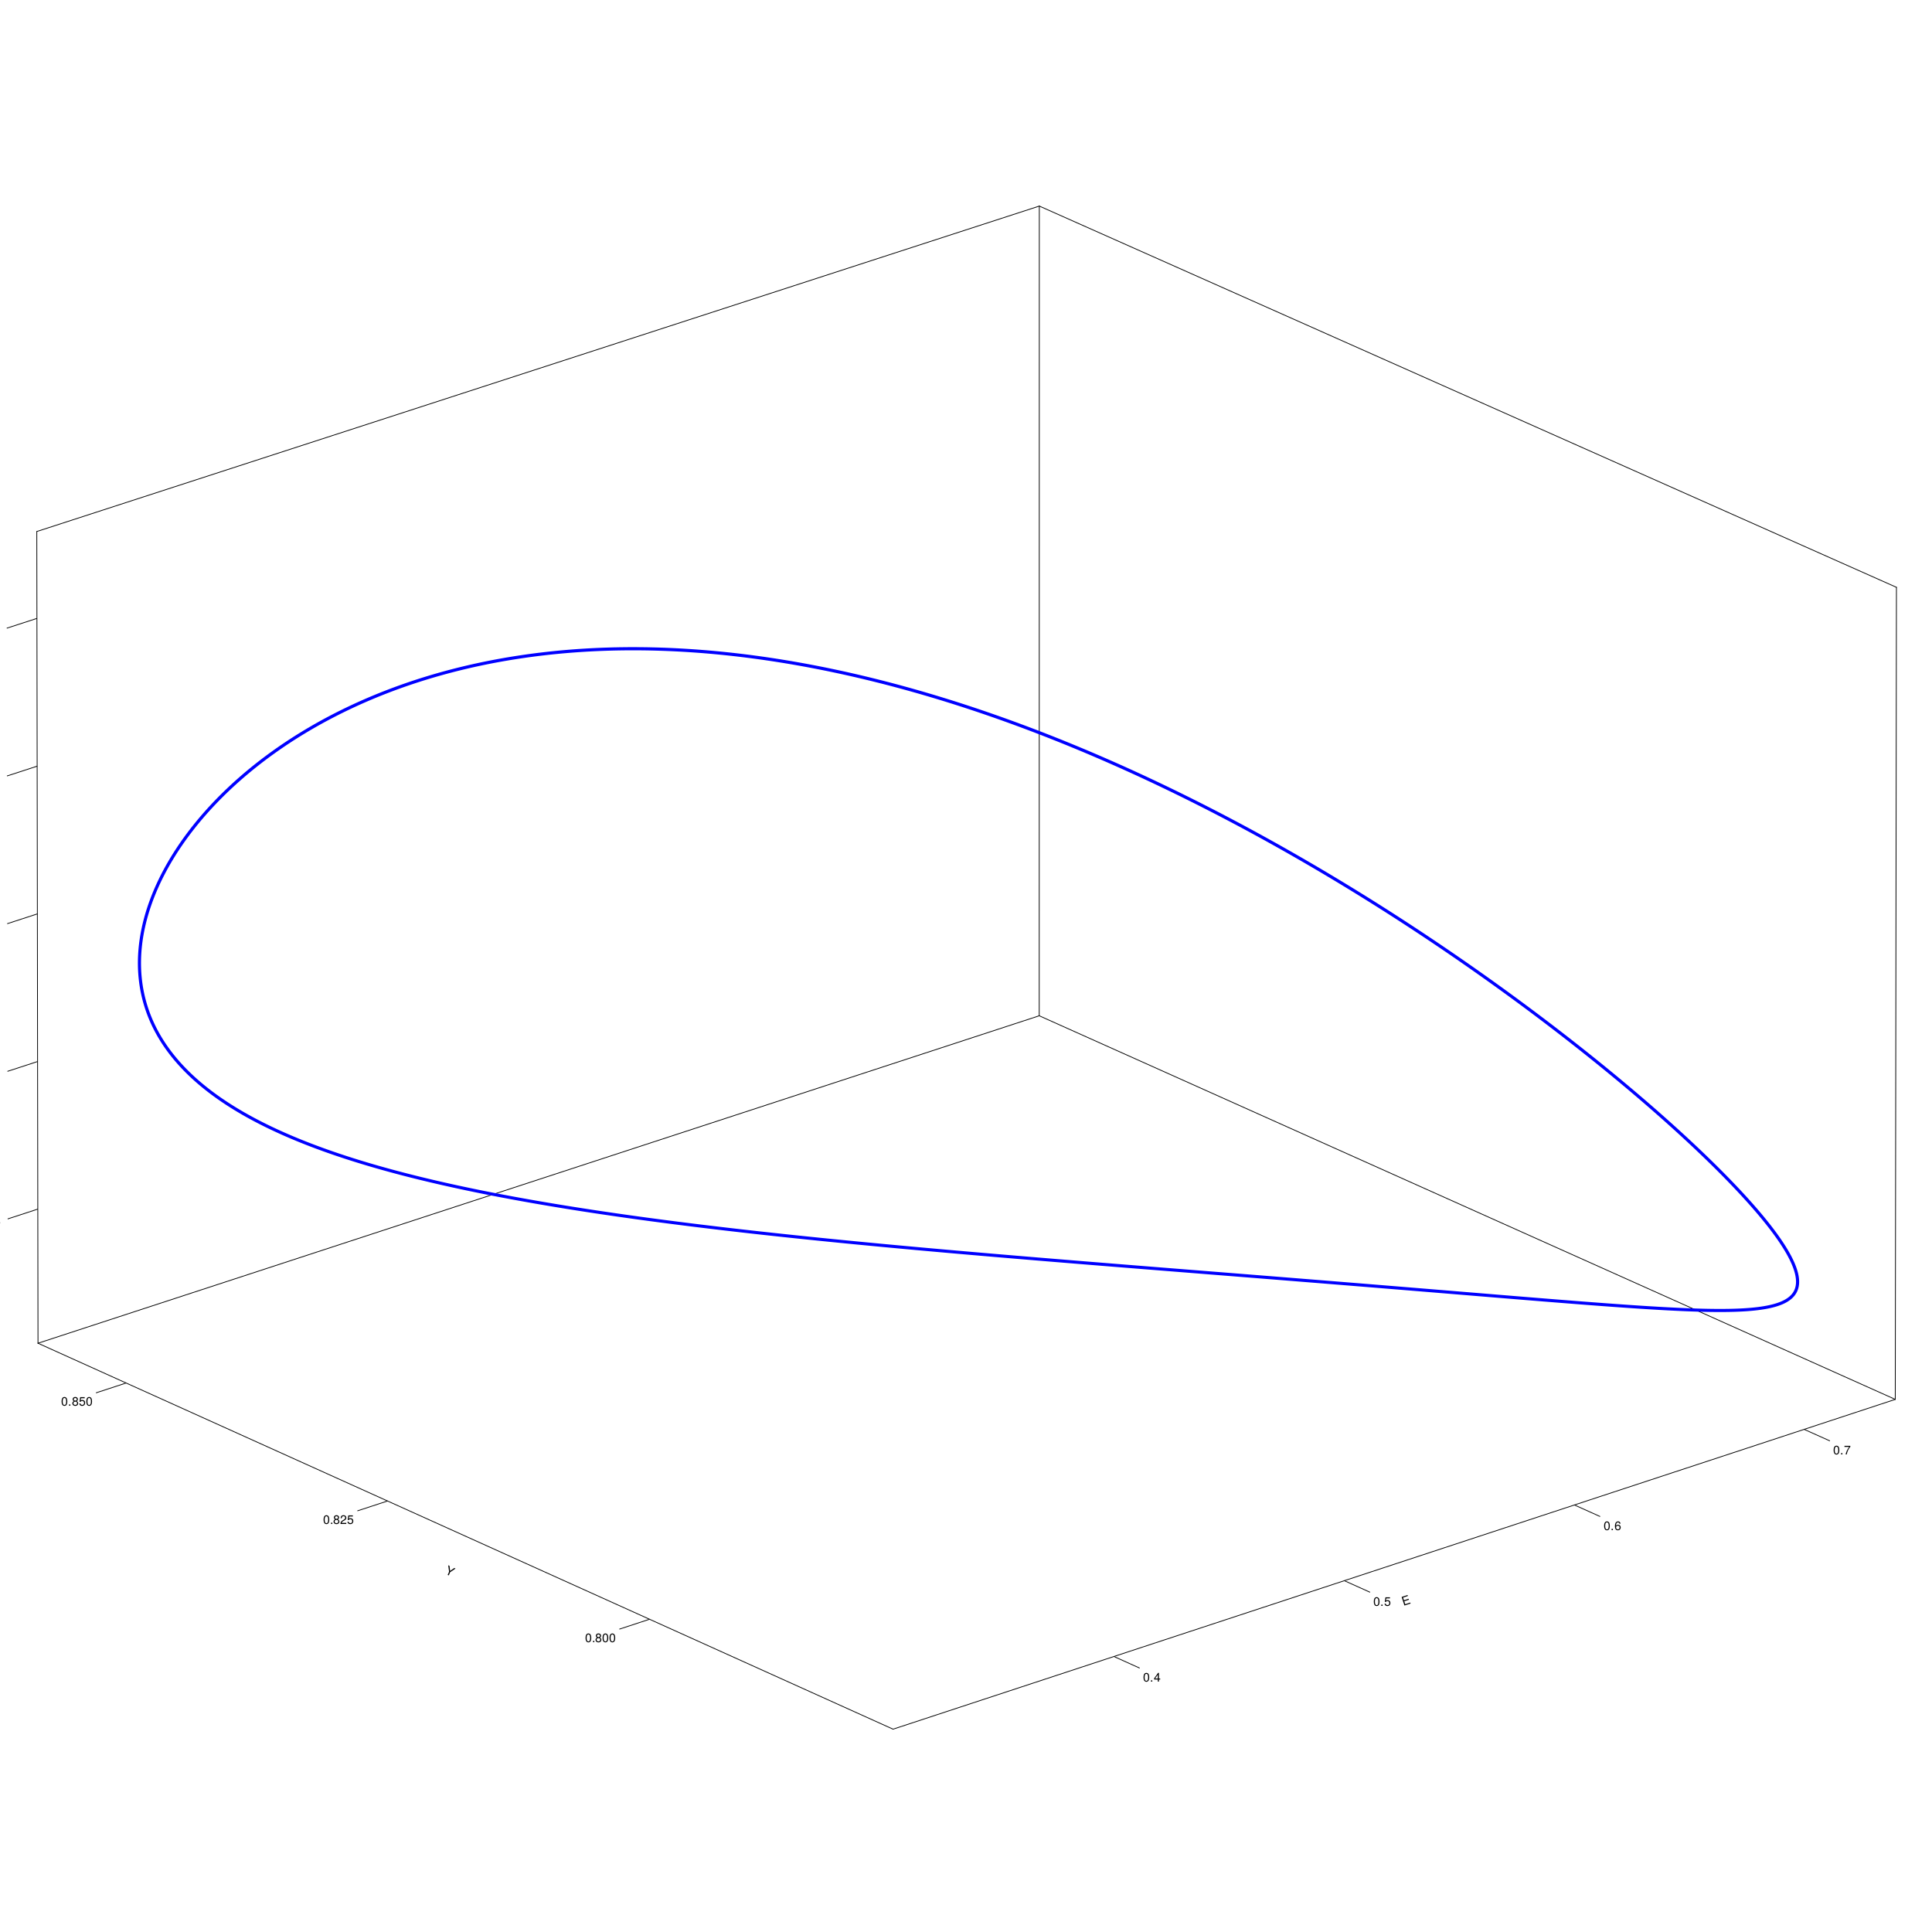

In [13]:
cord1 = 2
cord2 = 3
cord3 = 1
ts, tf = 420000, 430000

f = Figure(resolution = (2500, 2500))
ax = Axis3(f[1, 1], xlabel = "E", ylabel = "Y", zlabel = "u")
ax.xgridvisible = false
ax.ygridvisible = false
ax.zgridvisible = false
lines!(tr[ts:tf, cord1], tr[ts:tf, cord2], tr[ts:tf, cord3], linewidth = 4, color = "blue")

f

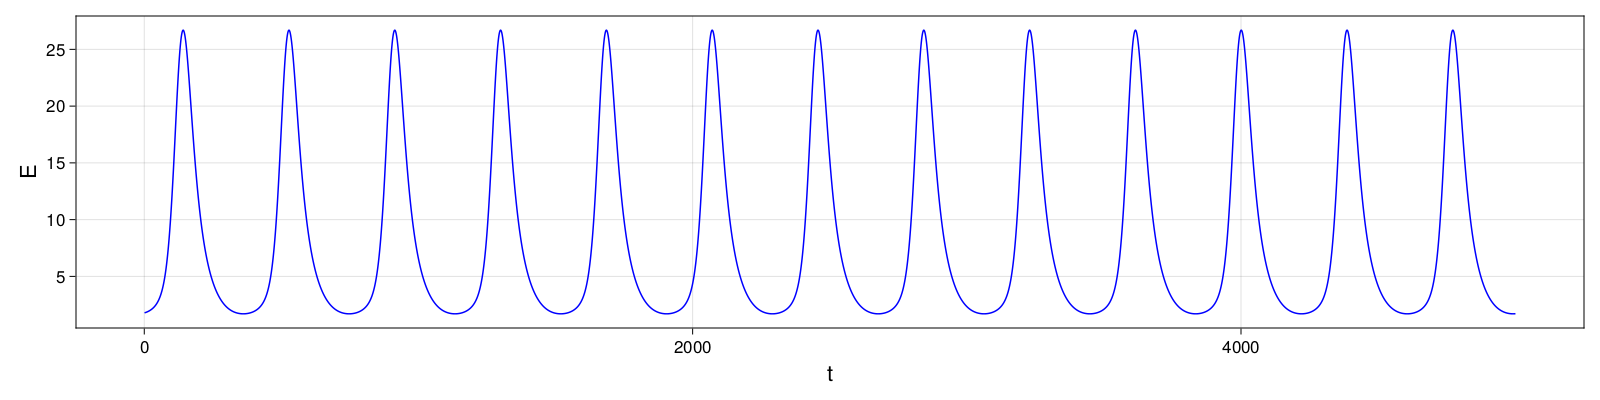

In [14]:
ts, tf = 420000, 425000

f = Figure(resolution = (1600, 400))
ax1 = Axis(f[1, 1], xlabel = "t", ylabel = "E", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)
#ax2 = Axis(f[2, 1], xlabel = "t", ylabel = "X, u, Y", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)

lines!(ax1, tr[ts:tf, 1], color = "blue", label = "E")


#lines!(ax2, tr[ts:tf, 2], color = "red", label = "X")
#lines!(ax2, tr[ts:tf, 3], color = "green", label = "u")
#lines!(ax2, tr[ts:tf, 4], color = "orange", label = "Y")


"""
ax1.xgridvisible = false
ax1.ygridvisible = false
ax2.xgridvisible = false
ax2.ygridvisible = false"""

f